In [3]:
pip install PrettyTable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import prettytable as pt
%matplotlib inline

In [35]:
kdrama_df = pd.read_excel("C:\\Users\\User\\Downloads\\archive (3)\\drama_list.xlsx")
# Perform the calculation and add a new column "total_hours"
kdrama_df["total_hours"] = ((((kdrama_df['tot_eps'] * kdrama_df['duration'].astype(float)) / 3600).astype(int)).astype(str)).replace("0","lower than 1") + " hours"

In [6]:
def custom_sort(df,columns,ascending):
     return df.sort_values(by=columns,ascending=ascending)

def custom_table(custom_column_titles, custom_top_10, custom_columns):
    # Creating a table with custom column titles
    top_10_table = pt.PrettyTable(custom_column_titles)

    # Add rows to the table
    for _, row in custom_top_10.iterrows():
        row_values = [row[column] for column in custom_columns]
        top_10_table.add_row(row_values)

    return top_10_table

In [39]:
# Create a copy to avoid modifying the original DataFrame
unique_kdrama = kdrama_df.drop_duplicates('drama_name').copy()

columns_to_sum = ['Story Score', 'Acting Casts', 'music_score', 'rewatch_value_score', 'overall_score']

# Use .loc to modify the original DataFrame
unique_kdrama.loc[:, 'total_scores_by_drama'] = unique_kdrama.groupby('drama_name')[columns_to_sum].transform('sum').sum(axis=1)

sorted_kdrama_df_by_drama = custom_sort(unique_kdrama, ['total_scores_by_drama', 'drama_name'], False)
custom_top_10 = sorted_kdrama_df_by_drama.head(10)

custom_column_titles = ["Drama","Total Score","Total Episodes","Duration","Start Date","End Date","aired_on","Organization Net","Content Rate","Summary","Rank","Population"]
custom_columns = ["drama_name","total_scores_by_drama","tot_eps","total_hours","Start Date","End Date","aired_on","org_net","content_rt","synopsis","rank","pop"]

top_10_drama = custom_table(custom_column_titles, custom_top_10, custom_columns)

top_10_drama

Drama,Total Score,Total Episodes,Duration,Start Date,End Date,aired_on,Organization Net,Content Rate,Summary,Rank,Population
The Fiery Priest,595.0,40,23 hours,02/15/2019,04/20/2019,"Friday, Saturday",SBS,15+ - Teens 15 or older,"Kim Hae Il is a Catholic priest. He makes spiteful remarks, and he can be rude to others. Koo Dae Young is a detective. He talks a lot, and he is also timid. Park Kyung Sun is a prosecutor. She is smart and beautiful. She is also ambitious as a prosecutor and good at her job.The three of them team up and work together to solve a murder case involving a senior Catholic priest.(Source: AsianWiki)",237,404
Youth of May,590.0,12,14 hours,05/03/2021,06/08/2021,"Monday, Tuesday",KBS2,15+ - Teens 15 or older,"Hee Tae becomes the pride of Gwangju when he enters Seoul National University College of Medicine with top marks. His best friend Kyung Soo, an avid pro-democracy activist, insists that they open an illegal clinic for students on the run from the government. One day, a factory worker is injured during a protest. In exchange for the costs of discreetly transporting himself and the factory worker to his hometown, Hee Tae must go to a meeting with a potential marriage partner arranged by his father. At this meeting, Hee Tae meets Myung Hee, a nurse persevering through the hardships of life. She only agrees to go to this meeting in place of her friend Soo Ryeon, because she needs to come up with the airfare to go study in Germany. However, Myung Hee and Hee Tae end up falling in love. In May of 1980, amidst the heated passion and cries for democracy that reverberated throughout Gwangju, Hee Tae and Myung Hee find themselves in a twist of fate.(Source: Viki)~~ Based on real events of the Gwangju Uprising that happened in the city ofGwangju,South Korea, from May 18 to May 27, 1980.",165,182
My Mister,586.5,16,20 hours,03/21/2018,05/17/2018,"Wednesday, Thursday",tvN,15+ - Teens 15 or older,"Park Dong Hoon is a middle-aged engineer who is married to attorney Kang Yoon Hee. However, his life is not that happy as he has two unemployed brothers, Sang Hoon and Gi Hoon, who rely on him. Moreover, his wife is secretly having an affair with CEO Do Joon Yeong, his current boss and college junior.Receiving an unexpected bribe one day, Dong Hoon notices that his co-worker Lee Ji An witnessed the incident. Ji An is a young part-time worker at Dong Hoon's company who is drowning in debt and left alone to take care of her ill grandmother. Dong Hoon then gets entangled in his brothers' struggle to get back on their feet and the company's internal rivalry between the company's CEO and the people opposing him. All the while, unaware that CEO Joon Yeong wants to get rid of him and that Ji An is working for him.(Source: MyDramaList)",33,106
Good Manager,579.0,20,20 hours,01/25/2017,03/30/2017,"Wednesday, Thursday",KBS2,15+ - Teens 15 or older,"Can corporate politics turn a bad person into a good person? Kim Sung Ryong is a skilled accountant who works for gangsters. He makes his way into a company called TQ Group as a middle manager in the accounting department with the intention of embezzling money from the company. As he contends with hot-shot accountant Yoon Ha Kyung, financial prodigy Seo Yul and peppy intern Hong Ga Eun, Sung Ryong finds himself embroiled in office politics and notices other shenanigans by those in power that threaten to bring down the company. Sung Ryong slowly comes to realize that heâ€™d rather fight against corporate corruption and fight for employeesâ€™ rights than complete the mission he originally came to do. Can he succeed at his new objective against all odds?(Source: KoreanDrama.org)",358,284
Six Flying Dragons,576.0,50,50 hours,10/05/2015,03/22/2016,"Monday, Tuesday",SBS,15+ - Teens 15 or older,"A fictional, historical drama about the ambition, rise and fall of real and fictional characters based around Yi Bang Won. Yi Bang Won was the third king of the Joseon Dynasty in Korea and the father of K

In [40]:
# Top 10 Drama by population
sorted_kdrama_df_by_drama = custom_sort(unique_kdrama,['pop','drama_name'],False)
custom_top_10 = sorted_kdrama_df_by_drama.head(10)
custom_column_titles = ["Drama","Population","Total Episodes","Duration","Start Date","End Date","aired_on","Organization Net","Content Rate","Summary","Rank"]
custom_columns = ["drama_name","pop","tot_eps","total_hours","Start Date","End Date","aired_on","org_net","content_rt","synopsis","rank"]
top_10_drama = custom_table(custom_column_titles, custom_top_10, custom_columns)
top_10_drama

Drama,Population,Total Episodes,Duration,Start Date,End Date,aired_on,Organization Net,Content Rate,Summary,Rank
Zero Ability for Dating,99999,10,2 hours,11/05/2021,01/07/2022,Unknown,Unknown,Not Yet Rated,Among 7.9 billion people in the world. Where is my half who will warm up my heart...?(Source: ë°”ë°”ìš” by iHQ YouTube),62603
Yunseul,99999,5,lower than 1 hours,06/16/2021,06/16/2021,Wednesday,Unknown,Not Yet Rated,"Yunseul is about a story that transcends 1,500 years of time and space from the ancient Three Kingdoms period to the present in Yeosu, Korea. It is a fusion historical fantasy romance drama where three main characters keep being engaged in a love triangle over many reincarnated life-times.(Source: ížë§ì—¬ìˆ˜ì•¼ on YouTube)",99999
"Yum Yum, How Tasty! 2",99999,5,lower than 1 hours,03/19/2021,04/16/2021,Friday,Unknown,Not Yet Rated,No summary,60863
"Yum Yum, How Tasty!",99999,4,lower than 1 hours,05/03/2019,05/24/2019,Friday,Unknown,Not Yet Rated,"Yoo Joo was born and lived in Gwangju for 30 years. Her original dream was to be a food photographer, and now she works as a photographer and marketing agent for an advertising company. As she entered her third year, her personality has changed a lot. In the past, she used to be arrogant and stubborn, but now she doesn't even put her mouth on, and only chooses good words to listen to clients.",61653
Youth Syndrome,99999,10,lower than 1 hours,08/24/2016,10/27/2016,Unknown,Unknown,Not Yet Rated,"After his discharge from the military, Hee-cheol, the wanderer, is excited to travel around the country. But he decides to go back to school when he runs out of money. Hee-cheol finds school really dull and wonders how to make the experience more enjoyable.He starts a strange club called ""THE AXIA"" under the pretext of a ""Youth Club"" and recruits members. Five people who each feel their own sense of inferiority drift into the strange club and join it and begin the search to get back their lost youth from dwelling on the past, the stress of reality, and uneasiness about the future.(Source: HanCinema)",99999
Youn Hee's Love,99999,8,2 hours,05/05/2022,07/14/2022,"Tuesday, Thursday",Unknown,Not Yet Rated,"There are countless relationships and exes in the world and there are many jerks too. Talking behind ex-lovers' backs in ""Youn Hee's Love"". (Source: Nanometer)",57117
You Donâ€™t Even Know The Taste of Americano,99999,8,1 hours,01/01/2019,01/01/2019,Unknown,Unknown,Not Yet Rated,No summary,54713
You & It,99999,8,1 hours,01/05/2022,01/28/2022,"Wednesday, Friday",Unknown,G - All Ages,"""My dead girlfriend is back as an AI robot""A story to be honest in front of love and longing.(Source: Gamsung Click YouTube Channel)",52442
Yeokkeuni Season 3,99999,7,1 hours,01/25/2022,02/23/2023,Tuesday,Unknown,Not Yet Rated,No summary,56012
Yeokkeuni Season 2,99999,5,lower than 1 hours,10/19/2021,11/16/2021,Tuesday,Unknown,Not Yet Rated,No summary,59848


In [41]:
# Top 10 Drama by rank
sorted_kdrama_df_by_drama = custom_sort(unique_kdrama,['rank','drama_name'],True)
custom_top_10 = sorted_kdrama_df_by_drama.head(10)
custom_column_titles = ["Rank","Drama","Population","Total Episodes","Duration","Start Date","End Date","aired_on","Organization Net","Content Rate","Summary"]
custom_columns = ["rank","drama_name","pop","tot_eps","total_hours","Start Date","End Date","aired_on","org_net","content_rt","synopsis"]
top_10_drama = custom_table(custom_column_titles, custom_top_10, custom_columns)
top_10_drama

Rank,Drama,Population,Total Episodes,Duration,Start Date,End Date,aired_on,Organization Net,Content Rate,Summary
9,Move to Heaven,86,10,8 hours,05/14/2021,05/14/2021,Friday,Netflix,18+ Restricted (violence & profanity),"Han Geu Roo is an autistic 20-year-old. He works for his fatherâ€™s business â€œMove To Heaven,â€ a company that specializes in crime scene cleanup, where they also collect and arrange items left by deceased people, and deliver them to the bereaved family.When Geu Roo's father dies, Geu Roo's guardianship passes to his uncle, ex-convict Cho Sang Gu, who is a martial arts fighter in underground matches. Per the father's will, Sang Gu must care for and work with Geu Roo in â€œMove To Heavenâ€ for three months to gain full guardianship and claim the inheritance. Eying money, Sang Gu agrees to the conditions and moves in.(Source: MyDramaList)~~ Adapted from the nonfiction essay ""Things Left Behind"" by professional trauma cleaner Kim Sae Byul."
15,Weak Hero Class 1,179,8,5 hours,11/18/2022,11/18/2022,Friday,Unknown,18+ Restricted (violence & profanity),"Yeon Shi Eun is a model student who ranks at the top of his high school. Physically, Yeon Shi Eun appears weak, but by using his wits and psychology, he fights against the violence that takes place inside and outside of his school. (Source: Asianwiki)~~ Adapted from the webtoon â€œWeak Heroâ€ (ì•½í•œì˜ì›…) written by SeoPass (ì„œíŒ¨ìŠ¤) and illustrated by Kim Jin Seok (ê¹€ì§„ì„). ~~ Release dates: Oct 7, 2022 (Festival) || Nov 18, 2022 (Online)"
17,Hospital Playlist Season 2,161,12,20 hours,06/17/2021,09/16/2021,Thursday,Netflix tvN,15+ - Teens 15 or older,"Everyday is extraordinary for five doctors and their patients inside a hospital, where birth, death and everything in between coexist.(Source: Netflix)"
19,Flower of Evil,28,16,18 hours,07/29/2020,09/23/2020,"Wednesday, Thursday",tvN,15+ - Teens 15 or older,"Although Baek Hee Sung is hiding a dark secret surrounding his true identity, he has established a happy family life and a successful career. He is a loving husband and doting father to his young daughter. But his perfect faÃ§ade begins to crumble when his wife, Cha Ji Won, a homicide detective, begins investigating a string of serial murders from 15 years ago. Ji Won notices changes in Hee Sungâ€™s behavior and begins to wonder if he could possibly be hiding something from her. (Source: MyDramaList)"
23,Hospital Playlist,49,12,18 hours,03/12/2020,05/28/2020,Thursday,Netflix tvN,15+ - Teens 15 or older,"The stories of people going through their days are seemingly ordinary but actually special at the hospital, a place known as the microcosm of life, where someone is being born and someone's life meets its ending. The five doctors are long-time friends of 20 years who started their undergrad in 1999 in the same medical school and now are colleagues in the same hospital and have a band together.(Source: Korean = Naver || Translation = YeoNiverse at MyDramaList)"
24,Alchemy of Souls,87,20,26 hours,06/18/2022,08/28/2022,"Saturday, Sunday",Netflix tvN,15+ - Teens 15 or older,"Set in a fictional country called Daeho that does not exist in history or on maps, it is about the love and growth of young mages as they overcome their twisted fates due to a forbidden magic spell known as the ""alchemy of souls"", which allows souls to switch bodies.It follows the story of an elite assassin named Naksu, whose soul is accidentally trapped inside the weak body of Mu Deokâ€”Jang Uk's servant from a powerful and noble mage family in the country. The young master of the Jang Family, Jang Uk, holds a dark secret about his scandalous birth. He wants the formidable assassin to help change his destiny.(Source: Soompi; The Korea Herald)"
26,Reply 1988,41,20,31 hours,11/06/2015,01/16/2016,"Friday, Saturday",tvN,15+ - Teens 15 or older,"Five childhood friends, who all live in the same Ssangmundong neighborhood of Seoul, lean on each other to survive their challenging teen years an

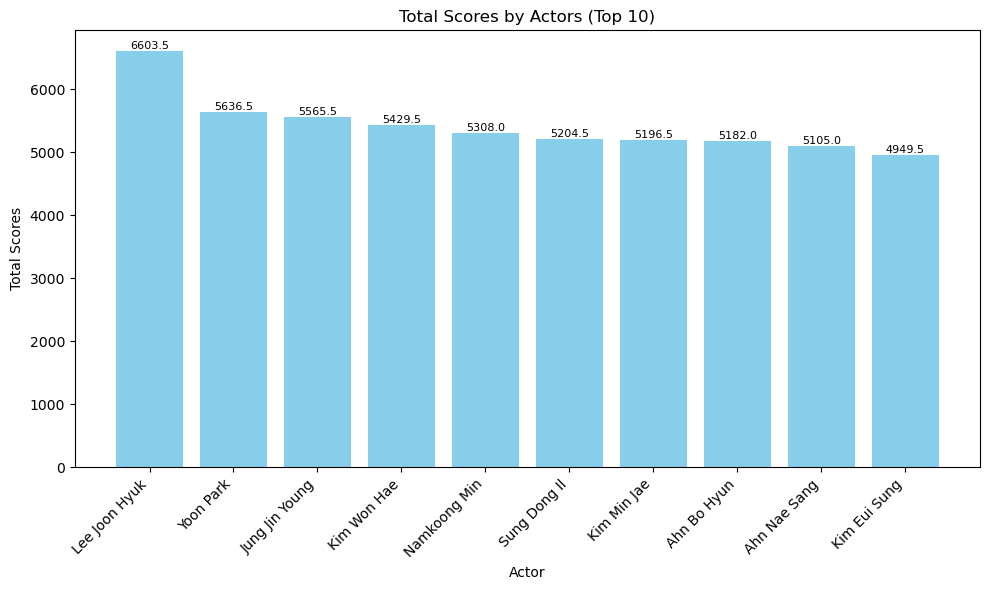

In [42]:
# Top 10 Actors by scores
kdrama_df['total_scores_by_actors'] = kdrama_df.groupby('Actors')[columns_to_sum].transform('sum').sum(axis=1)
sorted_kdrama_df_by_actors = custom_sort(kdrama_df,['total_scores_by_actors','Actors'],False)
custom_top_10 = sorted_kdrama_df_by_actors.drop_duplicates('Actors').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['Actors'], custom_top_10['total_scores_by_actors'], color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Total Scores')
plt.title('Total Scores by Actors (Top 10)')
# Add data labels with total scores to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}', ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

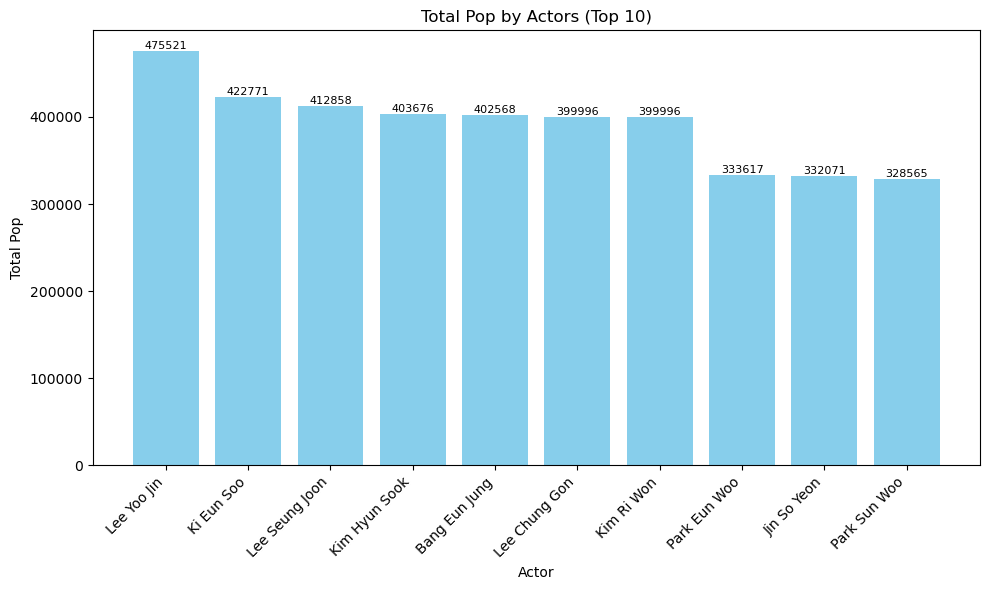

In [43]:
# Top 10 Popular Actor
kdrama_df['total_pop_by_actors'] = kdrama_df.groupby('Actors')['pop'].transform('sum')
sorted_kdrama_df_by_actors = custom_sort(kdrama_df,['total_pop_by_actors','Actors'],False)
custom_top_10 = sorted_kdrama_df_by_actors[sorted_kdrama_df_by_actors['Actors'] != 'Unknown'].drop_duplicates('Actors').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['Actors'], custom_top_10['total_pop_by_actors'], color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Total Pop')
plt.title('Total Pop by Actors (Top 10)')
# Add data labels with total scores to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}', ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

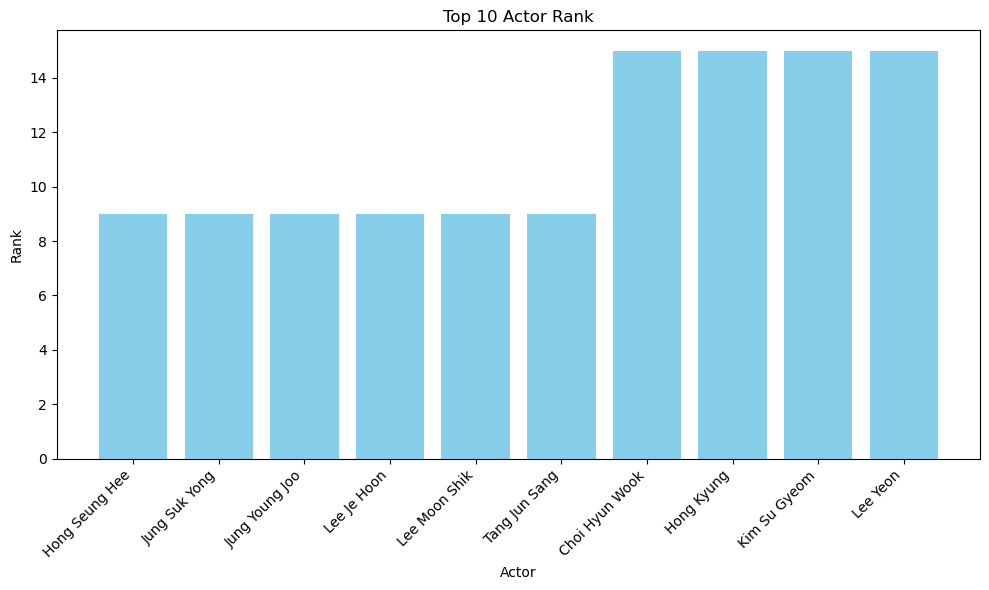

In [44]:
# Top 10 Rank Actors
sorted_kdrama_df_by_actors = custom_sort(kdrama_df,['rank','Actors'],True)
custom_top_10 = sorted_kdrama_df_by_actors[sorted_kdrama_df_by_actors['Actors'] != 'Unknown'].drop_duplicates('Actors').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['Actors'], custom_top_10['rank'], color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Rank')
plt.title('Top 10 Actor Rank')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

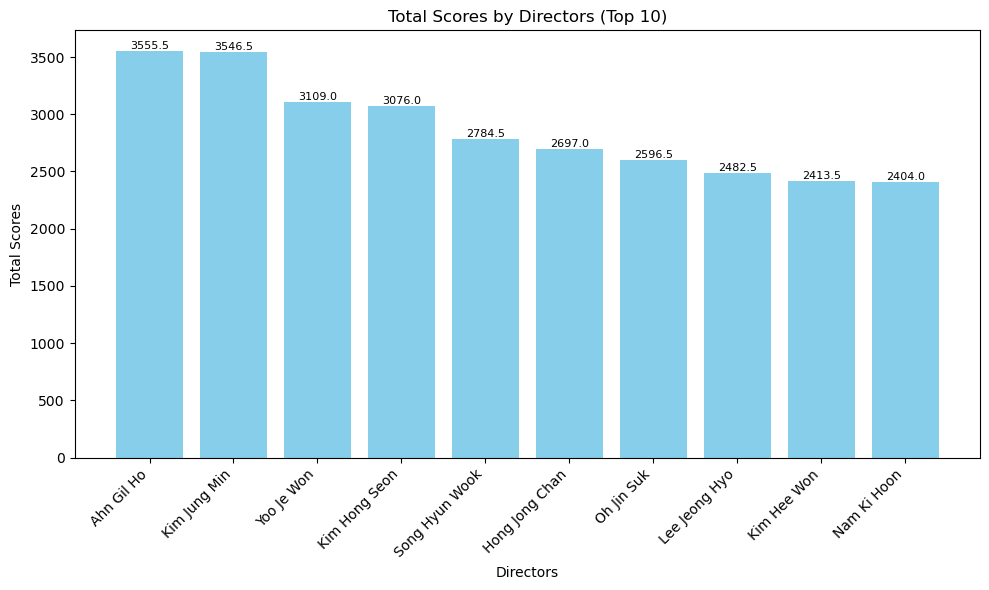

In [47]:
# Top 10 Directors by scores
# Use .loc to modify the original DataFrame
unique_kdrama.loc[:, 'total_scores_by_directors'] = unique_kdrama.groupby('director')[columns_to_sum].transform('sum').sum(axis=1)
sorted_kdrama_df_by_directors = custom_sort(unique_kdrama,['total_scores_by_directors','director'],False)
custom_top_10 = sorted_kdrama_df_by_directors[sorted_kdrama_df_by_directors['director'] != 'Unknown'].drop_duplicates('director').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['director'], custom_top_10['total_scores_by_directors'], color='skyblue')
plt.xlabel('Directors')
plt.ylabel('Total Scores')
plt.title('Total Scores by Directors (Top 10)')
# Add data labels with total scores to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}', ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

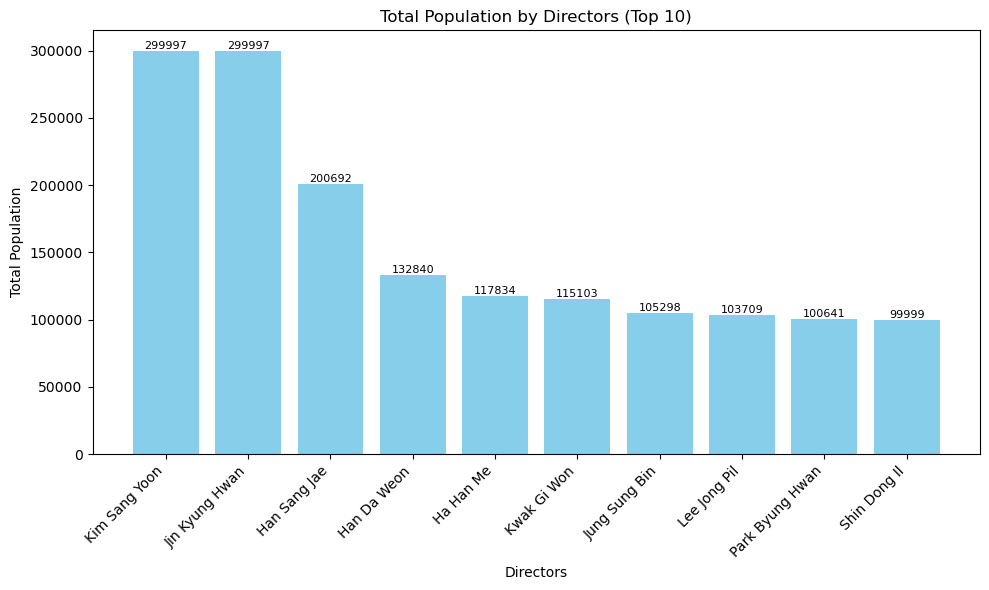

In [48]:
# Top 10 Directors by pop
unique_kdrama['total_pop_by_directors'] = unique_kdrama.groupby('director')['pop'].transform('sum')
sorted_kdrama_df_by_pop_directors = custom_sort(unique_kdrama,['total_pop_by_directors','director'],False)
custom_top_10 = sorted_kdrama_df_by_pop_directors[sorted_kdrama_df_by_pop_directors['director'] != 'Unknown'].drop_duplicates('director').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['director'], custom_top_10['total_pop_by_directors'], color='skyblue')
plt.xlabel('Directors')
plt.ylabel('Total Population')
plt.title('Total Population by Directors (Top 10)')
# Add data labels with total scores to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}', ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

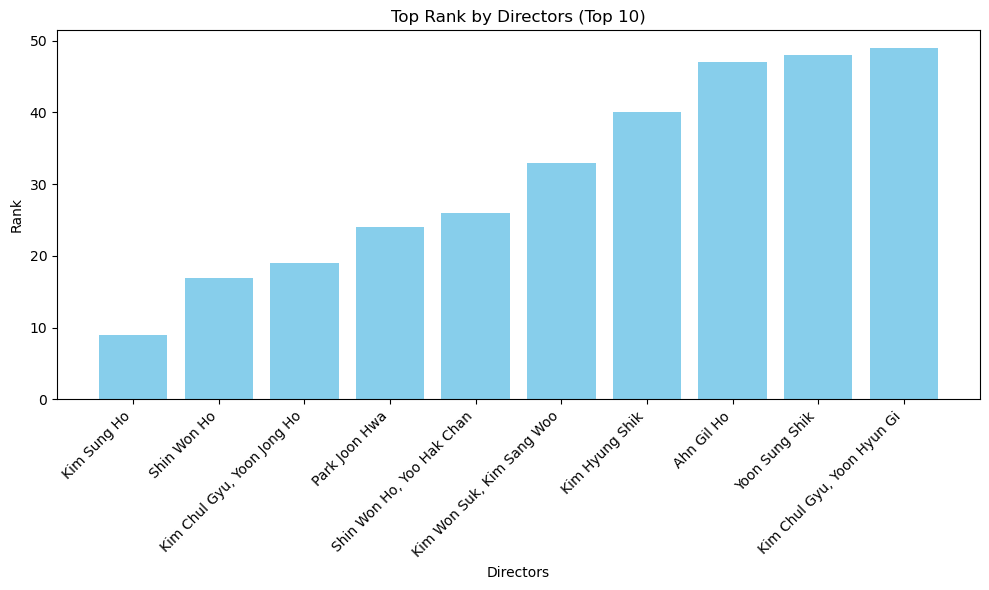

In [49]:
# Top 10 Directors by rank
sorted_kdrama_df_by_rank_directors = custom_sort(unique_kdrama,['rank','director'],True)
custom_top_10 = sorted_kdrama_df_by_rank_directors[sorted_kdrama_df_by_rank_directors['director'] != 'Unknown'].drop_duplicates('director').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['director'], custom_top_10['rank'], color='skyblue')
plt.xlabel('Directors')
plt.ylabel('Rank')
plt.title('Top Rank by Directors (Top 10)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

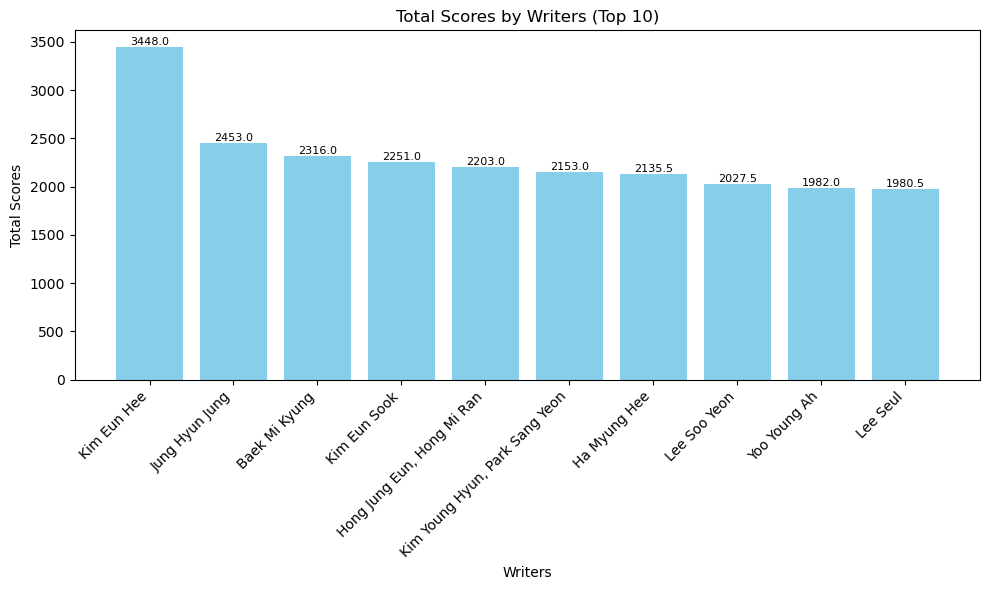

In [52]:
# Top 10 Writers by scores
unique_kdrama.loc[:, 'total_scores_by_writers'] = unique_kdrama.groupby('screenwriter')[columns_to_sum].transform('sum').sum(axis=1)
sorted_kdrama_df_by_writers = custom_sort(unique_kdrama,['total_scores_by_writers','screenwriter'],False)
custom_top_10 = sorted_kdrama_df_by_writers[sorted_kdrama_df_by_writers['screenwriter'] != 'Unknown'].drop_duplicates('screenwriter').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['screenwriter'], custom_top_10['total_scores_by_writers'], color='skyblue')
plt.xlabel('Writers')
plt.ylabel('Total Scores')
plt.title('Total Scores by Writers (Top 10)')
# Add data labels with total scores to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}', ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

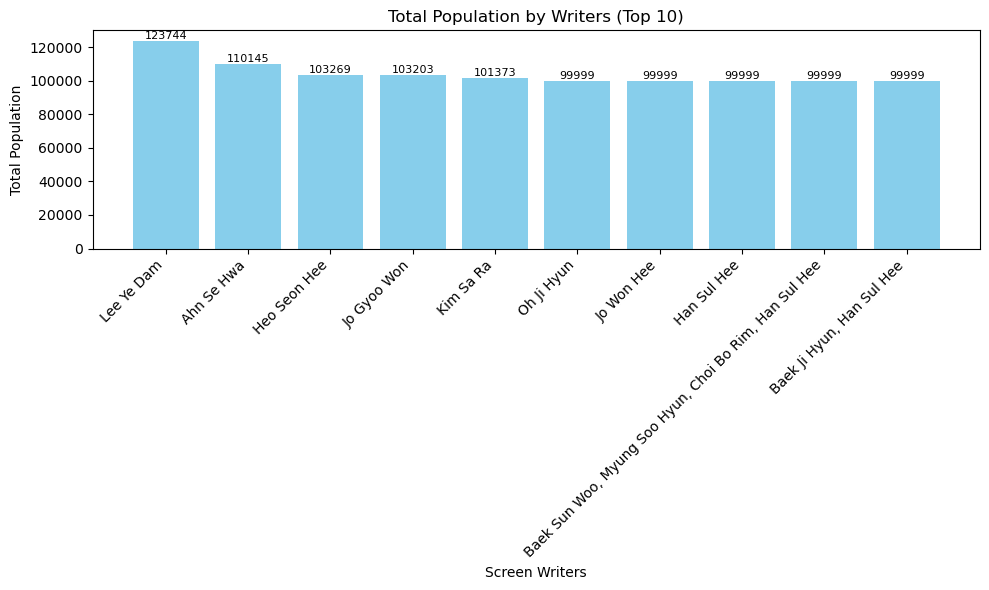

In [54]:
# Top 10 Writers by pop
unique_kdrama['total_pop_by_writers'] = unique_kdrama.groupby('screenwriter')['pop'].transform('sum')
sorted_kdrama_df_by_pop_writers = custom_sort(unique_kdrama,['total_pop_by_writers','screenwriter'],False)
custom_top_10 = sorted_kdrama_df_by_pop_writers[sorted_kdrama_df_by_pop_writers['screenwriter'] != 'Unknown'].drop_duplicates('screenwriter').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['screenwriter'], custom_top_10['total_pop_by_writers'], color='skyblue')
plt.xlabel('Screen Writers')
plt.ylabel('Total Population')
plt.title('Total Population by Writers (Top 10)')
# Add data labels with total scores to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}', ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

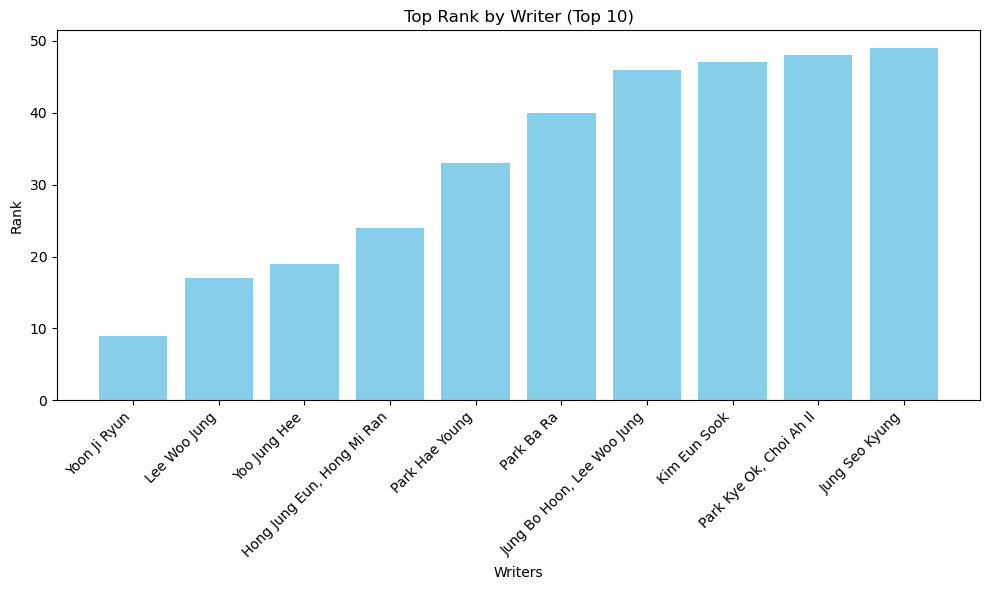

In [55]:
# Top 10 Writers by rank
sorted_kdrama_df_by_rank_writers = custom_sort(unique_kdrama,['rank','screenwriter'],True)
custom_top_10 = sorted_kdrama_df_by_rank_writers[sorted_kdrama_df_by_rank_writers['screenwriter'] != 'Unknown'].drop_duplicates('screenwriter').head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['screenwriter'], custom_top_10['rank'], color='skyblue')
plt.xlabel('Writers')
plt.ylabel('Rank')
plt.title('Top Rank by Writer (Top 10)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

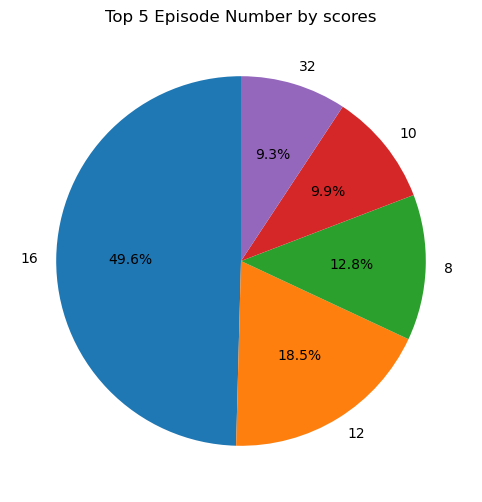

In [56]:
# Top 5 Episodes by scores
unique_kdrama.loc[:, 'total_scores_by_episodes'] = unique_kdrama.groupby('tot_eps')[columns_to_sum].transform('sum').sum(axis=1)
sorted_kdrama_df_by_episodes = custom_sort(unique_kdrama,['total_scores_by_episodes','tot_eps'],False)
top_5_score_episodes_df = sorted_kdrama_df_by_episodes[sorted_kdrama_df_by_episodes['tot_eps'] != 0].drop_duplicates('tot_eps').head(5)
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(top_5_score_episodes_df['total_scores_by_episodes'], labels=top_5_score_episodes_df ['tot_eps'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Episode Number by scores')
plt.show()

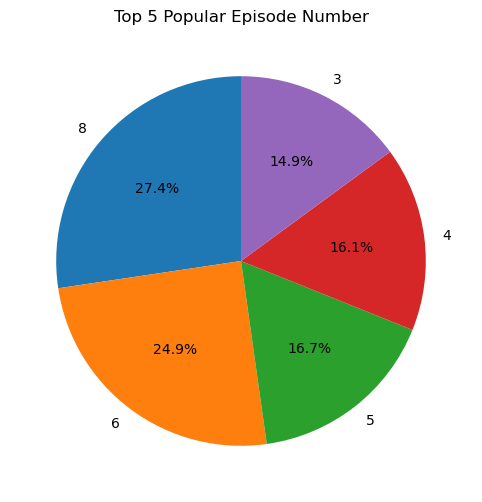

In [57]:
# Top 5 Episodes by pop
unique_kdrama['total_pop_by_episodes'] = unique_kdrama.groupby('tot_eps')['pop'].transform('sum')
sorted_kdrama_df_by_pop_episodes = custom_sort(unique_kdrama,['total_pop_by_episodes','tot_eps'],False)
top_5_pop_episodes_df = sorted_kdrama_df_by_pop_episodes[sorted_kdrama_df_by_pop_episodes['tot_eps'] != '0'].drop_duplicates('tot_eps').head(5)
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(top_5_pop_episodes_df['total_pop_by_episodes'], labels=top_5_pop_episodes_df['tot_eps'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Popular Episode Number')
plt.show()

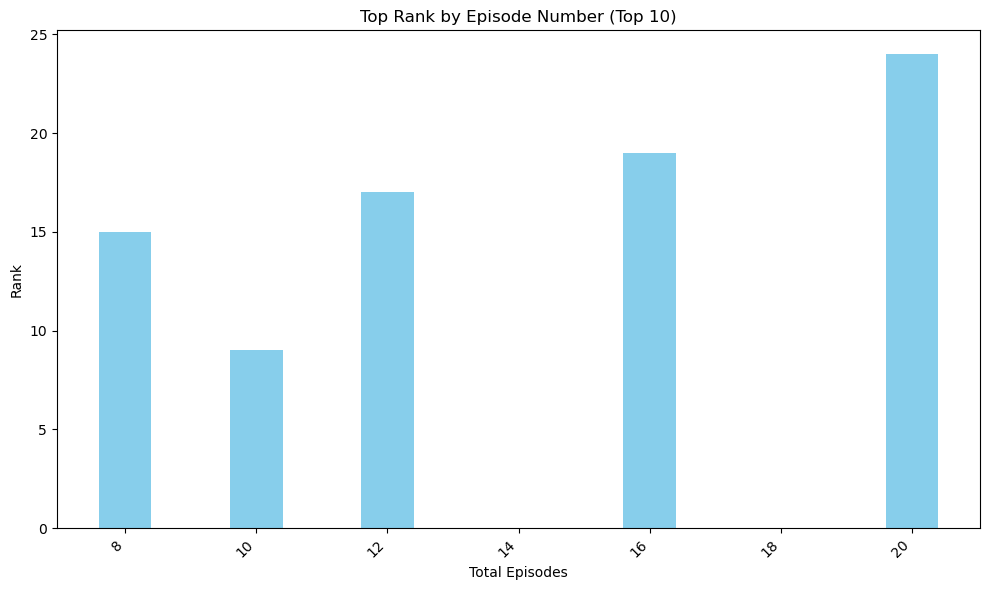

In [14]:
# Top 10 Episodes by rank
sorted_kdrama_df_by_rank_episodes = custom_sort(unique_kdrama,['rank','tot_eps'],True)
custom_top_10 = sorted_kdrama_df_by_rank_episodes[sorted_kdrama_df_by_rank_episodes['tot_eps'] != 0].drop_duplicates('tot_eps').head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_top_10['tot_eps'], custom_top_10['rank'], color='skyblue')
plt.xlabel('Total Episodes')
plt.ylabel('Rank')
plt.title('Top Rank by Episode Number (Top 10)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

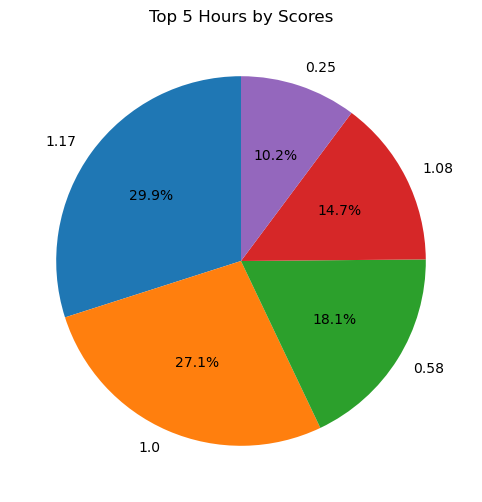

In [61]:
# Calculate duration per episode
unique_kdrama['duration_per_episode'] = (unique_kdrama['duration'].astype(float) / 3600).round(2)

# Sum scores for each group of duration_per_episode
unique_kdrama.loc[:, 'total_scores_by_hours'] = unique_kdrama.groupby('duration_per_episode')[columns_to_sum].transform('sum').sum(axis=1)

# Sort the DataFrame using your custom_sort function
sorted_kdrama_df_by_hours = custom_sort(unique_kdrama, ['total_scores_by_hours', 'duration_per_episode'], False)

# Filter out rows where duration_per_episode is greater than 0, drop duplicates, and take the top 5
top_5_score_hours_df = sorted_kdrama_df_by_hours[sorted_kdrama_df_by_hours['duration_per_episode'] > 0].drop_duplicates('duration_per_episode').head(5)

plt.figure(figsize=(10, 6))
plt.pie(top_5_score_hours_df['total_scores_by_hours'], labels=top_5_score_hours_df['duration_per_episode'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Hours by Scores')
plt.show()

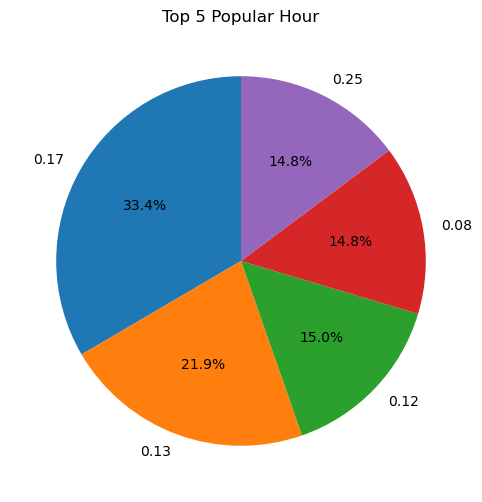

In [63]:
# Top 5  by pop
unique_kdrama['total_pop_by_hours'] = unique_kdrama.groupby('duration_per_episode')['pop'].transform('sum')
sorted_kdrama_df_by_pop_hours = custom_sort(unique_kdrama,['total_pop_by_hours','duration_per_episode'],False)
top_5_pop_hours_df = sorted_kdrama_df_by_pop_hours[sorted_kdrama_df_by_pop_hours['duration_per_episode'] != '0'].drop_duplicates('duration_per_episode').head(5)
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(top_5_pop_hours_df['total_pop_by_hours'], labels=top_5_pop_hours_df['duration_per_episode'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Popular Hour')
plt.show()

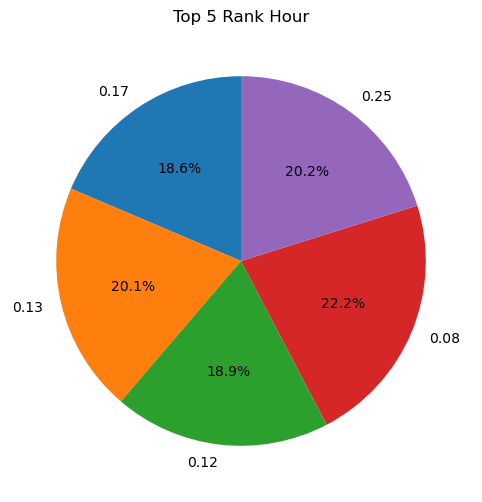

In [64]:
# Top 5 pop by rank
sorted_kdrama_df_by_rank_hours = custom_sort(unique_kdrama,['rank','duration_per_episode'],True)
custom_top_10_rank = sorted_kdrama_df_by_rank_hours[sorted_kdrama_df_by_rank_hours['duration_per_episode'] != 0].drop_duplicates('duration_per_episode').head(5)
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(top_5_pop_hours_df['rank'], labels=top_5_pop_hours_df['duration_per_episode'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Rank Hour')
plt.show()

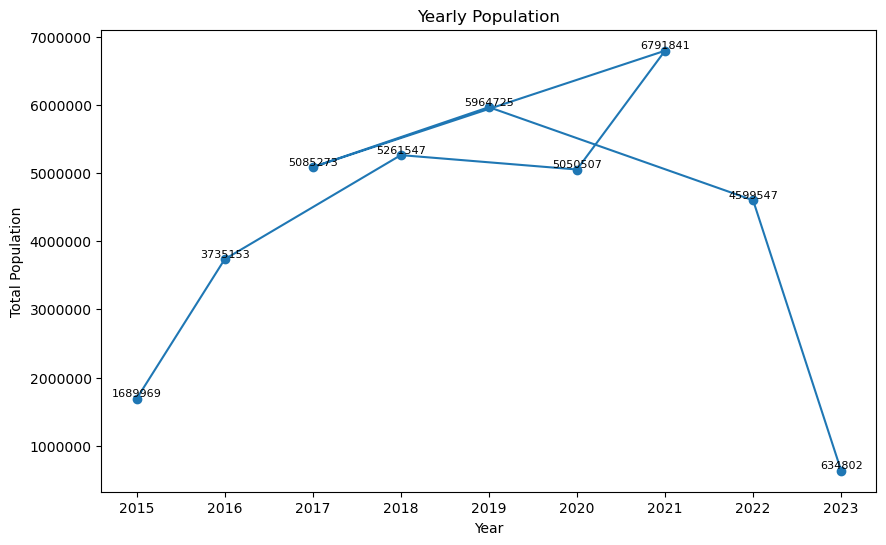

In [70]:
# Calculate total population by year
unique_kdrama['total_pop_by_year'] = unique_kdrama.groupby('year')['pop'].transform('sum')
top_10_pop_year_df = unique_kdrama.drop_duplicates('year')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_pop_year_df['year'], top_10_pop_year_df['total_pop_by_year'], marker='o', linestyle='-')

# Annotate the top of the line with the actual numeric values
for i, value in enumerate(top_10_pop_year_df['total_pop_by_year']):
    plt.text(top_10_pop_year_df['year'].iloc[i], value, f'{value:.0f}', ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Yearly Population')

# Disable scientific notation on the y-axis ticks
plt.ticklabel_format(style='plain', axis='y')
# Display the chart
plt.show()

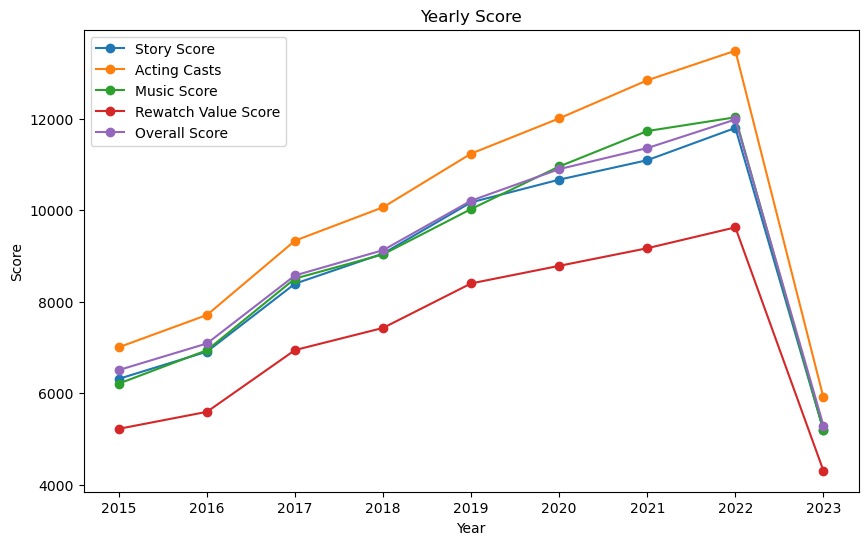

In [68]:
# Calculate total population by year
total_scores_by_year = unique_kdrama.groupby('year').agg({
    'Story Score': 'sum',
    'Acting Casts': 'sum',
    'music_score': 'sum',
    'rewatch_value_score': 'sum',
    'overall_score': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
# Plot multiple lines
plt.plot(total_scores_by_year['year'], total_scores_by_year['Story Score'], marker='o', linestyle='-', label='Story Score')
plt.plot(total_scores_by_year['year'], total_scores_by_year['Acting Casts'], marker='o', linestyle='-', label='Acting Casts')
plt.plot(total_scores_by_year['year'], total_scores_by_year['music_score'], marker='o', linestyle='-', label='Music Score')
plt.plot(total_scores_by_year['year'], total_scores_by_year['rewatch_value_score'], marker='o', linestyle='-', label='Rewatch Value Score')
plt.plot(total_scores_by_year['year'], total_scores_by_year['overall_score'], marker='o', linestyle='-', label='Overall Score')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Yearly Score')

# Disable scientific notation on the y-axis ticks
plt.ticklabel_format(style='plain', axis='y')
# Display the legend
plt.legend()
# Display the chart
plt.show()